In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

df = pd.read_csv(r'C:\Users\aacjp\OneDrive\Desktop\data\tables\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
def get_best_classifier(methods, parameters, X, y, metric):
    est = []
    for i in range(len(methods)):
        clf = GridSearchCV(methods[i].fit(X, y), parameters[i], cv=5, scoring=metric, verbose=2, return_train_score=True, n_jobs=-1).fit(X, y)
        est.append(clf.best_estimator_)
    return est

def get_accuracy_and_recall(models, model_names, X_train, X_test, y_train, y_test):
    results = {}
    for i in range(len(models)):
        model = models[i].fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        cm = confusion_matrix(y_test, predictions)
        recall = cm[1][1] / (cm[1][1]+cm[1][0])
        results[model_names[i]] = {'accuracy': accuracy, 'recall': recall}
    return results

We will be primarially focused of acheiving high recall. This is because we are predicting which customers will stop using our product/service. In this situation it is better to be safe than sorry as false positives are not as bad as false negatives.

In [3]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
gender = []
for i in range(len(df)):
    if df['Gender'][i] == 'Female':
        gender.append(1)
    else:
        gender.append(0)
        
df['Gender'] = gender
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [5]:
geo = np.array(list(df['Geography'])).reshape(-1, 1)

In [6]:
ohe = OneHotEncoder().fit(geo).transform(geo).toarray()
geog = pd.DataFrame(ohe)
geog.columns = ['France', 'Germany', 'Spain']
df = pd.concat([df.drop(['Geography'], axis='columns'), geog], axis='columns')
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


The average active member is 39.8
The average non-active member is 38.0


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


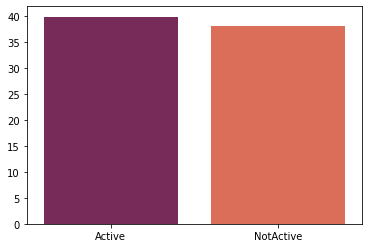

In [7]:
df.corr()['IsActiveMember']
x = [round(np.mean(df.loc[df['IsActiveMember'] == 1]['Age']) ,1), round(np.mean(df.loc[df['IsActiveMember'] == 0]['Age']) ,1)]
Y = ['Active', 'NotActive']
sns.barplot(Y, x, palette='rocket')
print("The average active member is {}".format(x[0]))
print("The average non-active member is {}".format(x[1]))

810 of our French members have left
814 of our German members have left
1223 of our Spanish members have left


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


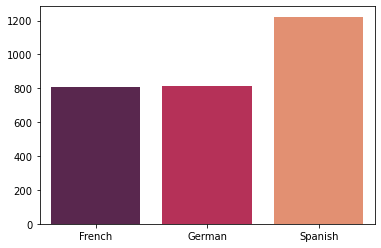

In [8]:
French = 0
German = 0
Spanish = 0
for i in range(len(df.loc[df['Exited'] == 1])):
    if list(df.loc[df['Exited'] == 1]['France'])[i] == 1.0:
        French += 1
    if list(df.loc[df['Exited'] == 1]['Germany'])[i] == 1.0:
        German += 1  
    else:
        Spanish += 1
        
x = [French, German, Spanish]
y = ['French', 'German', 'Spanish']
sns.barplot(y, x, palette='rocket')
print("{} of our French members have left".format(x[0]))
print("{} of our German members have left".format(x[1]))
print("{} of our Spanish members have left".format(x[2]))

2591 of our active members are from France
1248 of our active members are from Germany
3903 of our active members are from Spain


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


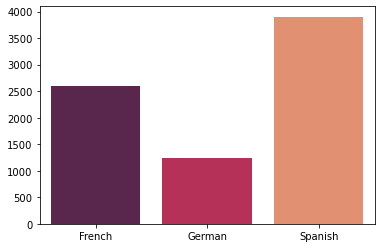

In [9]:
French = 0
German = 0
Spanish = 0
for i in range(len(df.loc[df['IsActiveMember'] == 1])):
    if list(df.loc[df['IsActiveMember'] == 1]['France'])[i] == 1.0:
        French += 1
    if list(df.loc[df['IsActiveMember'] == 1]['Germany'])[i] == 1.0:
        German += 1  
    else:
        Spanish += 1
        
x = [French, German, Spanish]
y = ['French', 'German', 'Spanish']
sns.barplot(y, x, palette='rocket')
print("{} of our active members are from France".format(x[0]))
print("{} of our active members are from Germany".format(x[1]))
print("{} of our active members are from Spain".format(x[2]))

In [10]:
X = df.drop(['Exited'], axis='columns')
y = df['Exited']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [12]:
logreg_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'fit_intercept': ['True', 'False'], 'C': range(1, 102, 10), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
knn_params = {'n_neighbors': range(1, 202, 4), 'p':[1, 2, 3, 4], 'weights': ['uniform', 'distance']}
gnb_params = {'var_smoothing': [1e-11, 1e-9, 1e-7, 1e-5, 1]}
parameters = [logreg_params, knn_params, gnb_params]
methods = [LogisticRegression(), KNeighborsClassifier(), GaussianNB()]

In [13]:
get_best_classifier(methods, parameters, X_train, y_train, 'recall')

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 408 candidates, totalling 2040 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2040 out of 2040 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


[LogisticRegression(C=41, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=1, p=1),
 GaussianNB(var_smoothing=1e-11)]

In [14]:
tuned_models = [LogisticRegression(C=41, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=1, p=1),
 GaussianNB(var_smoothing=1e-11)]
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Naive Bayes']

In [15]:
get_accuracy_and_recall(tuned_models, model_names, X_train, X_test, y_train, y_test)

{'Logistic Regression': {'accuracy': 0.822, 'recall': 0.25},
 'K Nearest Neighbors': {'accuracy': 0.688, 'recall': 0.22058823529411764},
 'Naive Bayes': {'accuracy': 0.829, 'recall': 0.35784313725490197}}

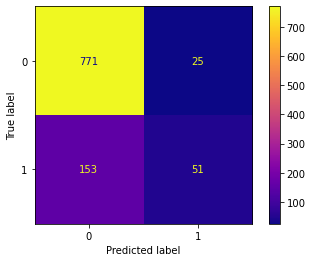

In [16]:
plot_confusion_matrix(tuned_models[0], X_test, y_test, cmap='plasma')

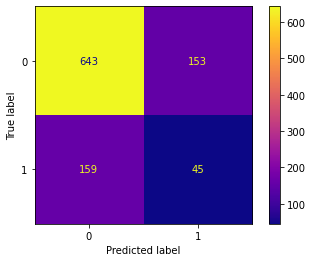

In [17]:
plot_confusion_matrix(tuned_models[1], X_test, y_test, cmap='plasma')

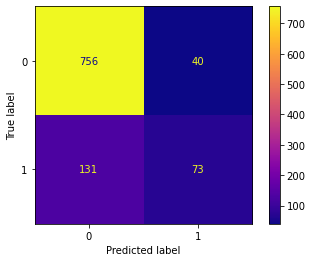

In [18]:
plot_confusion_matrix(tuned_models[2], X_test, y_test, cmap='plasma')

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
Xsm = SMOTE().fit_sample(X, y)[0]
ysm = SMOTE().fit_sample(X, y)[1]
X_trsm, X_tesm, y_trsm, y_tesm = train_test_split(Xsm, ysm, test_size=0.1)

In [30]:
get_best_classifier(methods, parameters, X_trsm, y_trsm, 'recall')

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 408 candidates, totalling 2040 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2040 out of 2040 | elapsed:  5.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


[LogisticRegression(C=21, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=13, p=1, weights='distance'),
 GaussianNB(var_smoothing=1e-11)]

In [33]:
smm = [LogisticRegression(C=21, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=13, p=1, weights='distance'),
 GaussianNB(var_smoothing=1e-11)]

In [34]:
get_accuracy_and_recall(smm, model_names, X_trsm, X_tesm, y_trsm, y_tesm)

{'Logistic Regression': {'accuracy': 0.7652228499686127,
  'recall': 0.7850821744627055},
 'K Nearest Neighbors': {'accuracy': 0.7106089139987445,
  'recall': 0.8331226295828066},
 'Naive Bayes': {'accuracy': 0.7765222849968613, 'recall': 0.797724399494311}}

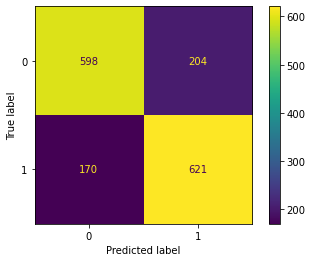

In [40]:
plot_confusion_matrix(smm[0], X_tesm, y_tesm)

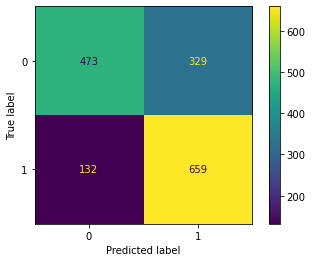

In [41]:
plot_confusion_matrix(smm[1], X_tesm, y_tesm)

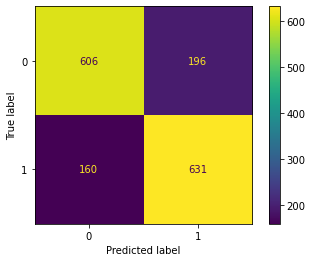

In [42]:
plot_confusion_matrix(smm[2], X_tesm, y_tesm)

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [75]:
Xss = pd.DataFrame(MinMaxScaler().fit(Xsm).transform(Xsm))

In [76]:
X_trss, X_tess, y_trss, y_tess = train_test_split(Xss, ysm, test_size=0.1)

In [77]:
get_best_classifier(methods, parameters, X_trss, y_trss, 'recall')

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 2124 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 2177 out of 2200 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:   14.1s finished


Fitting 5 folds for each of 408 candidates, totalling 2040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 2040 out of 2040 | elapsed: 35.7min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


[LogisticRegression(C=1, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=1, p=1),
 GaussianNB(var_smoothing=1)]

In [78]:
smss = [LogisticRegression(C=1, fit_intercept='True', penalty='l1', solver='liblinear'),
 KNeighborsClassifier(n_neighbors=1, p=1),
 GaussianNB(var_smoothing=1)]

In [79]:
get_accuracy_and_recall(smss, model_names, X_trss, X_tess, y_trss, y_tess)

{'Logistic Regression': {'accuracy': 0.7583176396735719,
  'recall': 0.7783251231527094},
 'K Nearest Neighbors': {'accuracy': 0.8493408662900188,
  'recall': 0.8559113300492611},
 'Naive Bayes': {'accuracy': 0.7225360954174513, 'recall': 0.8238916256157636}}

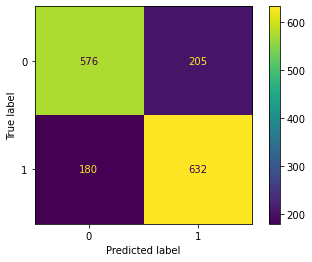

In [80]:
plot_confusion_matrix(smss[0], X_tess, y_tess)

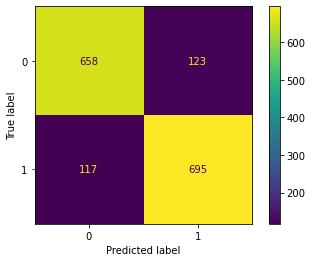

In [82]:
plot_confusion_matrix(smss[1], X_tess, y_tess)

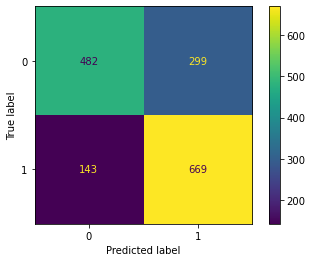

In [84]:
plot_confusion_matrix(smss[2], X_tess, y_tess)

In [86]:
print("Our mest model is {}".format(smss[1]))

Our mest model is KNeighborsClassifier(n_neighbors=1, p=1)
